# step1: 导入相应的包

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import init_utils
plt.rcParams['figure.figsize'] = (7.0,4.0)  #set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# step2: 初始化参数

In [2]:
def load_dataset(is_plot=True):
    ##从sklearn中加载数据
    np.random.seed(2018)
    train_X,train_y = sklearn.datasets.make_circles(n_samples=5000,noise=0.05)
    np.random.seed(2019)
    test_X,test_y = sklearn.datasets.make_circles(n_samples=200,noise=0.05)
    #print(train_X.shape,train_y.shape)
    #print(test_X.shape,test_y.shape)
    ##是否绘制图像(散点图)
    if is_plot:
        plt.scatter(train_X[:,0],train_X[:,1],c=train_y,s=4,cmap=plt.cm.Spectral)
    ##加载的数据矩阵化
    train_X = train_X.T
    train_y = train_y.reshape((1,train_y.shape[0]))
    test_X = test_X.T
    test_y = test_y.reshape((1,test_y.shape[0]))
    return train_X,train_y,test_X,test_y

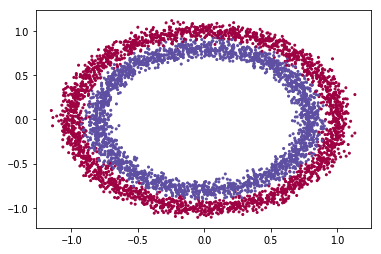

In [3]:
train_X,train_y,test_X,test_y = load_dataset(is_plot=True)

In [4]:
##定义relu函数
def relu(X):
    X = np.maximum(0,X)
    return X
##定义sigmod函数
def sigmod(X):
    return 1/(1+np.exp(-X))
##定义向前传播
def forward_propagation(X,parameters):
    ##获取每层的初始化参数
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    ##每一层的激活函数为relu->relu->sigmod
    Z1 = W1.dot(X)+b1
    a1 = relu(Z1)
    Z2 = W2.dot(a1)+b2
    a2 = relu(Z2)
    Z3 = W3.dot(a2)+b3
    a3 = sigmod(Z3)
    cache = (Z1,a1,W1,b1,Z2,a2,W2,b2,Z3,a3,W3,b3)
    return a3,cache

##定义成本函数
def compute_loss(y_heat,y):
    m = y.shape[1]
    loss = (-1/m)*np.sum(y*np.log(y_heat)+(1-y)*np.log(1-y_heat))
    return loss

##定义反向传播函数
def backward_propagetion(X,y,cache):
    m = X.shape[1]
    (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3) = cache
    
    dz3 = 1/m*(a3-y)
    dW3 = dz3.dot(a2.T)
    db3 = np.sum(dz3,axis=1,keepdims=True)
    
    da2 = np.dot(W3.T,dz3)
    dz2 = da2*np.int64(a2>0) ##relu函数的导数
    dW2 = dz2.dot(a1.T)
    db2 = np.sum(dz2,axis=1,keepdims=True)
    
    da1 = np.dot(W2.T,dz2)
    dz1 = da1*np.int64(a1>0) ##relu函数
    dW1 = dz1.dot(X.T)
    db1 = np.sum(dz1,axis=1,keepdims=True)
    
    gradients = {"dz3": dz3, "dW3": dW3, "db3": db3,
             "da2": da2, "dz2": dz2, "dW2": dW2, "db2": db2,
             "da1": da1, "dz1": dz1, "dW1": dW1, "db1": db1}
    
    return gradients

##定义更新参数
def update_parameters(parameters,grads,learning_rate):
    parameters['W1'] -=(learning_rate*grads['dW1'])
    parameters['b1'] -=(learning_rate*grads['db1'])
    parameters['W2'] -=(learning_rate*grads['dW2'])
    parameters['b2'] -=(learning_rate*grads['db2'])
    parameters['W3'] -=(learning_rate*grads['dW3'])
    parameters['b3'] -=(learning_rate*grads['db3'])
    return parameters
##定义初始化函数
def init(layer_dims,types):
    parameters = {}
    if types == 'zeros':
        parameters['W1'] = np.zeros((layer_dims[1],layer_dims[0]))
        parameters['b1'] = np.zeros((layer_dims[1],1))
        parameters['W2'] = np.zeros((layer_dims[2],layer_dims[1]))
        parameters['b2'] = np.zeros((layer_dims[2],1))
        parameters['W3'] = np.zeros((layer_dims[3],layer_dims[2]))
        parameters['b3'] = np.zeros((layer_dims[3],1))
    elif types == 'random':
        parameters['W1'] = np.random.rand(layer_dims[1],layer_dims[0])
        parameters['b1'] = np.random.rand(layer_dims[1],1)
        parameters['W2'] = np.random.rand(layer_dims[2],layer_dims[1])
        parameters['b2'] = np.random.rand(layer_dims[2],1)
        parameters['W3'] = np.random.rand(layer_dims[3],layer_dims[2])
        parameters['b3'] = np.random.rand(layer_dims[3],1)
    elif types == 'he': 
        parameters['W1'] = np.random.rand(layer_dims[1],layer_dims[0])*np.sqrt(2/layer_dims[0])
        parameters['b1'] = np.random.rand(layer_dims[1],1)
        parameters['W2'] = np.random.rand(layer_dims[2],layer_dims[1])*np.sqrt(2/layer_dims[1])
        parameters['b2'] = np.random.rand(layer_dims[2],1)
        parameters['W3'] = np.random.rand(layer_dims[3],layer_dims[2])*np.sqrt(2/layer_dims[2])
        parameters['b3'] = np.random.rand(layer_dims[3],1)
    else:
        print('参数错误')
        exit()
    return parameters
##预测函数
def predict(X,y,parameters):
    m = y.shape[1]
    result = np.zeros((1,m),dtype=np.int)
    a3, caches = forward_propagation(X, parameters)
    for i in range(0, a3.shape[1]):
        if a3[0,i] > 0.5:
            result[0,i] = 1
        else:
            result[0,i] = 0
    print("Accuracy: "  + str(np.mean((result[0,:] == y[0,:]))))
    return result

In [5]:
data = np.ones((1,2))
relu(data)

array([[1., 1.]])

In [6]:
##建立模型
def model(X,y,learning_rate = 0.01,num_iterations=15000,print_cost=True,initialization='he',is_plot=True):
    """
    实现一个三层的神经网络：linear->relu->linear->relu->liner->sigmod
    参数说明：
        print_cost:是否打印损失函数，每迭代1000次打印一次
        initialization:选择初始化的方式（0，随机，抑梯度）
        is_plot:绘制梯度下降曲线
    返回：
        parameters:学习后的参数
    """
    grads = {}
    costs = []
    m = X.shape[1]
    layers_dims = [X.shape[0],10,5,1]
    ##选择初始化参数的类型
    parameters = init(layers_dims,types=initialization)
    for i in range(1,num_iterations):
        ##向前传播
        a3,cache = forward_propagation(X,parameters)
        
        ##计算成本
        cost = compute_loss(a3,y)
        
        ##向后传播
        grads = backward_propagetion(X,y,cache)
        
        ##参数更新
        parameters = update_parameters(parameters,grads,learning_rate)
        
        ##记录成本
        if i%100 == 0:
            costs.append(cost)
            print_cost=False
            if print_cost:
                print('第'+str(i)+'次迭代，成本值为：'+str(cost))
   ##绘制成本曲线
    if is_plot:
        plt.plot(costs)
        plt.ylabel('cost')
        plt.xlabel('iterations hundreds')
        plt.title('Learning rate ='+str(learning_rate))
        plt.show()

    return parameters

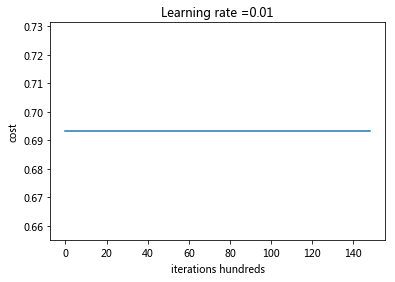

Accuracy: 0.5


array([[0, 0, 0, ..., 0, 0, 0]])

In [7]:
parameters = model(train_X,train_y,initialization='zeros')
predict(train_X,train_y,parameters)

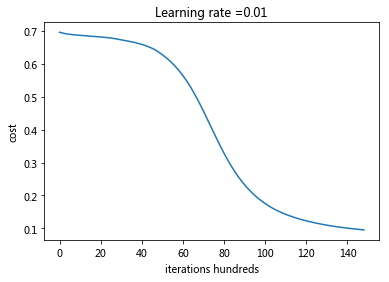

训练集：
Accuracy: 0.9682
测试集：
Accuracy: 0.96


In [8]:
parameters = model(train_X,train_y,initialization='random')
print('训练集：')
predict_train = predict(train_X,train_y,parameters)
print('测试集：')
predict_test = predict(test_X,test_y,parameters)

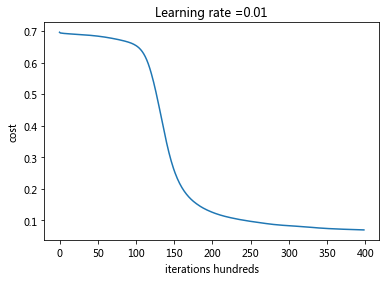

训练集：
Accuracy: 0.9732
测试集：
Accuracy: 0.975


In [9]:
parameters = model(train_X,train_y,initialization='he',num_iterations=40000)
print('训练集：')
predict_train = predict(train_X,train_y,parameters)
print('测试集：')
predict_test = predict(test_X,test_y,parameters)

# step3：正则化模型

In [18]:
def load_2D_dataset(is_plot=True):
    import scipy.io as sio
    data = sio.loadmat('../data/data.mat')
    train_X = data['X'].T
    train_y = data['y'].T
    test_X = data['Xval'].T
    test_y = data['yval'].T
    if is_plot:
        plt.scatter(train_X[0,:],train_X[1,:],c=np.squeeze(train_y),s=40,cmap=plt.cm.Spectral)
    return train_X,train_y,test_X,test_y

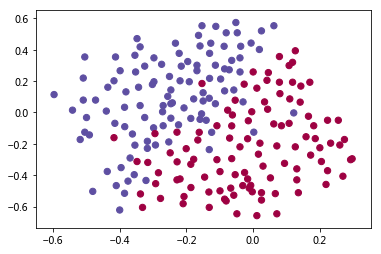

In [19]:
train_X,train_y,test_X,test_y = load_2D_dataset()

In [49]:
##dropout向前传播
def forward_propagation_dropout(X,parameters,keep_drop):
    np.random.seed(2018)
    
    # retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    Z1 = np.dot(W1,X)+b1
    a1 = relu(Z1)
    
    ##dropout第一层
    D1 = np.random.rand(a1.shape[0],a1.shape[1])
    D1 = D1<keep_drop
    a1 = a1*D1
    a1 = a1/keep_drop
    
    ##计算第二层
    Z2 = np.dot(W2,a1)+b2
    a2 = relu(Z2)
    
    ##dropout第二层
    D2 = np.random.rand(a2.shape[0],a2.shape[1])
    D2 = D2<keep_drop
    a2 = a2*D2
    a2 = a2/keep_drop
    
    #计算第三层
    Z3 = np.dot(W3,a2)+b3
    a3 = sigmod(Z3)
    
    cache = (Z1,D1,a1,W1,b1,Z2,D2,a2,W2,b2,Z3,a3,W3,b3)

    return a3,cache
    
    
    
##计算L2正则的损失函数
def compute_cost_with_regularization(a3,y,parameters,lambd):
    m = y.shape[1]
    W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters['W3']
    cross_entroy_cost = compute_loss(a3,y)
    L2_cost = (lambd/(2*m))*np.sum(np.sum(np.square(W1))+np.sum(np.square(W2))+np.sum(np.square(W2)))
    cost = cross_entroy_cost+L2_cost
    return cost
##向后传播
def backward_propagetion_with_regularization(X,y,cache,lambd):
    m = X.shape[1]
    (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3) = cache
    
    dz3 = a3-y
    dW3 = (1/m)*np.dot(dz3,a2.T) + ((lambd*W3)/m)
    db3 = (1/m)*np.sum(dz3,axis=1,keepdims=True)
    
    da2 = np.dot(W3.T,dz3)
    dz2 = da2*np.int64(a2>0)
    dW2 = (1/m)*np.dot(dz2,a1.T) + ((lambd*W2)/m)
    db2 = (1/m)*np.sum(dz2,axis=1,keepdims=True)
    
    da1 = np.dot(W2.T,dz2)
    dz1 = da1*np.int64(a1>0)
    dW1 = (1/m)*np.dot(dz1,X.T) + ((lambd*W1)/m)
    db1 = (1/m)*np.sum(dz1,axis=1,keepdims=True)
    
    gradients = {"dz3": dz3, "dW3": dW3, "db3": db3,
         "da2": da2, "dz2": dz2, "dW2": dW2, "db2": db2,
         "da1": da1, "dz1": dz1, "dW1": dW1, "db1": db1}
    return gradients
def backward_propagetion_with_dropout(X,y,cache,keep_drop):
    (Z1,D1,a1,W1,b1,Z2,D2,a2,W2,b2,Z3,a3,W3,b3) = cache
    m = X.shape[1]
    
    dz3 = (1/m)*(a3-y)
    dW3 = np.dot(dz3,a2.T)
    db3 = np.sum(dz3,axis=1,keepdims=True)
    
    da2 = np.dot(W3.T,dz3)
    da2 = da2*D2
    da2 = da2/keep_drop
    
    dz2 = da2*(np.int64(a2>0))
    dW2 = np.dot(dz2,a1.T)
    db2 = np.sum(dz2,axis=1,keepdims=True)
    
    da1 = np.dot(W2.T,dz2)
    da1 = da1*D1
    da1 = da1/keep_drop
    
    dz1 = da1*(np.int64(a1>0))
    dW1 = np.dot(dz1,X.T)
    db1 = np.sum(dz1,axis=1,keepdims=True)
    
    gradients = {"dz3": dz3, "dW3": dW3, "db3": db3,
             "da2": da2, "dz2": dz2, "dW2": dW2, "db2": db2,
             "da1": da1, "dz1": dz1, "dW1": dW1, "db1": db1}
    
    return gradients

In [50]:
##建立模型
def model(X,y,learning_rate = 0.03,num_iterations=1,print_cost=True,initialization='he',
          is_plot=True,
          lambd=0,keep_drop=1):
    """
    实现一个三层的神经网络：linear->relu->linear->relu->liner->sigmod
    参数说明：
        print_cost:是否打印损失函数，每迭代1000次打印一次
        initialization:选择初始化的方式（0，随机，抑梯度）
        is_plot:绘制梯度下降曲线
    返回：
        parameters:学习后的参数
    """
    grads = {}
    costs = []
    m = X.shape[1]
    layers_dims = [X.shape[0],20,3,1]
    ##选择初始化参数的类型
    parameters = init(layers_dims,types=initialization)
    for i in range(1,num_iterations):
        ##向前传播
        if keep_drop == 1:
            a3,cache = forward_propagation(X,parameters)
        elif keep_drop<1:
            a3,cache = forward_propagation_dropout(X,parameters,keep_drop)
        else:
            print('keep_drot参数错误')
            exit()
        ##计算成本
        ## 是否使用L2正则
        if lambd == 0 :
            cost = compute_loss(a3,y)
        else:
            cost = compute_cost_with_regularization(a3,y,parameters,lambd)
        
        ##向后传播
        
        if (lambd ==0 and keep_drop==1):
            grads = backward_propagetion(X,y,cache)
        elif lambd !=0:
            ##使用正则化
            grads = backward_propagetion_with_regularization(X,y,cache,lambd)
        elif keep_drop < 1:
            ##使用dropout
            grads = backward_propagetion_with_dropout(X,y,cache,keep_drop)
        
        ##参数更新
        parameters = update_parameters(parameters,grads,learning_rate)
        ##记录成本
        if i%100 == 0:
            costs.append(cost)
            print_cost=False
            if print_cost:
                print('第'+str(i)+'次迭代，成本值为：'+str(cost))
   ##绘制成本曲线
    if is_plot:
        plt.plot(costs)
        plt.ylabel('cost')
        plt.xlabel('iterations hundreds')
        plt.title('Learning rate ='+str(learning_rate))
        plt.show()

    return parameters

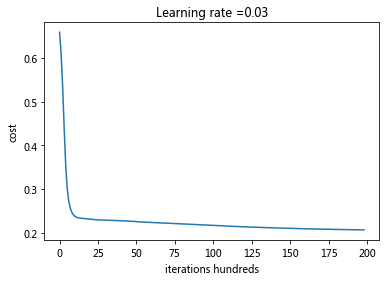

训练集：
Accuracy: 0.9289099526066351
测试集：
Accuracy: 0.94


In [40]:
parameters = model(train_X,train_y,initialization='random',num_iterations=20000)
print('训练集：')
predict_train = predict(train_X,train_y,parameters)
print('测试集：')
predict_test = predict(test_X,test_y,parameters)

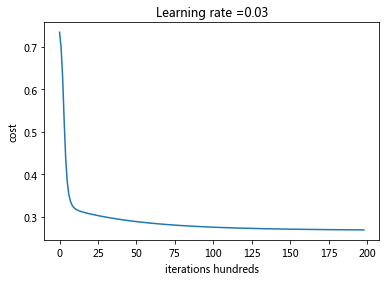

训练集：
Accuracy: 0.9289099526066351
测试集：
Accuracy: 0.935


In [42]:
parameters = model(train_X,train_y,initialization='random',num_iterations=20000,lambd=0.7)
print('训练集：')
predict_train = predict(train_X,train_y,parameters)
print('测试集：')
predict_test = predict(test_X,test_y,parameters)

d:\python36\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log
d:\python36\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in multiply


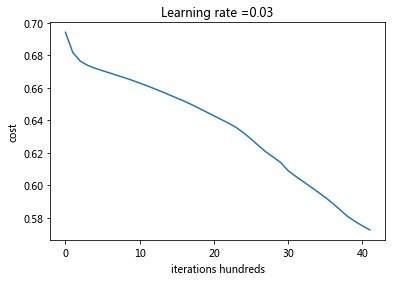

训练集：
Accuracy: 0.7251184834123223
测试集：
Accuracy: 0.69


In [52]:
parameters = model(train_X,train_y,initialization='random',num_iterations=60000,lambd=0,keep_drop=0.2)
print('训练集：')
predict_train = predict(train_X,train_y,parameters)
print('测试集：')
predict_test = predict(test_X,test_y,parameters)